# 1.Importing necessary libraries

In [3831]:
import warnings
warnings.filterwarnings('ignore')

In [3832]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing StatsModel Library for displaying detailed information about model

In [3833]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Importing Scikit Library for specific parameters and performing preprocessing steps (like Splitting & Scaling)

In [3834]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Data Sourcing

## Reading the data

In [3835]:
df=pd.read_csv('/content/day.csv')
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [3836]:
df.shape

(730, 16)

In [3837]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


###### Inference

* Data set contains one object and four float column

### one object column, and 4 float columns are present

## Data cleaning

In [3838]:
# Replacing the discreet numerical variable values to categorical values
df['season'].replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'}, inplace=True)
df['weathersit'].replace({1: 'normal', 2: 'misty', 3: 'light snow or rain', 4: 'bad weather'}, inplace = True)
df['mnth'].replace({1:'jan', 2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}, inplace = True)

In [3839]:
# Observing the statistical summary
df.describe(percentiles= [0.5, 0.75, 0.99])

instant          yr     holiday     weekday  workingday        temp  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    0.500000    0.028767    2.995890    0.690411   20.319259   
std    210.877136    0.500343    0.167266    2.000339    0.462641    7.506729   
min      1.000000    0.000000    0.000000    0.000000    0.000000    2.424346   
50%    365.500000    0.500000    0.000000    3.000000    1.000000   20.465826   
75%    547.750000    1.000000    0.000000    5.000000    1.000000   26.880615   
99%    722.710000    1.000000    1.000000    6.000000    1.000000   33.868050   
max    730.000000    1.000000    1.000000    6.000000    1.000000   35.328347   

            atemp         hum   windspeed       casual   registered  \
count  730.000000  730.000000  730.000000   730.000000   730.000000   
mean    23.726322   62.765175   12.763620   849.249315  3658.757534   
std      8.150308   14.237589    5.195841   686.479875  1559.758728   
min      3.953480    0.000000    1.500244     2.000000    20.000000   
50%     24.368225   62.625000   12.125325   717.000000  3664.500000   
75%     30.445775   72.989575   15.625589  1096.500000  4783.250000   
99%     38.941650   92.795857   27.380948  2931.680000  6787.390000   
max     42.044800   97.250000   34.000021  3410.000000  6946.000000   

               cnt  
count   730.000000  
mean   4508.006849  
std    1936.011647  
min      22.000000  
50%    4548.500000  
75%    5966.000000  
99%    8163.810000  
max    8714.000000

###### Inference

* we can see that 99% data and the max of the data are close by values which means that there are no outliers in the data



## Dropping of duplicates values if any

In [3840]:
#df.drop_duplicates()

### Checking for null values in the data

In [3841]:
# looking for any null values in the data
df.isna().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

###### inference: There are no null values in the data

#### Dropping of variables with no importance

In [3842]:
# let's drop the variables which are of continous timeline variables which add no values to the model
df.drop(['instant','dteday','casual','registered'], axis = 'columns', inplace=True)

In [3843]:
df.shape

(730, 12)

# univariate analysis

## finding the different values in the ordinal columns

###### Data visualization of discreet continous data

name of column is season
['spring' 'summer' 'fall' 'winter']


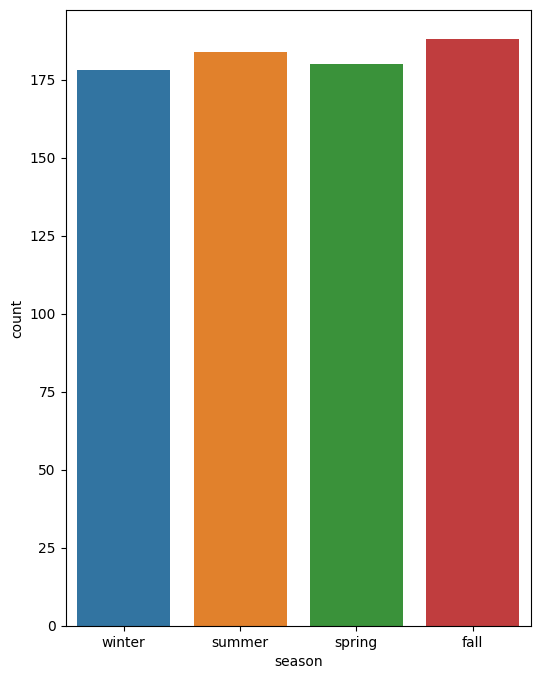

name of column is yr
[0 1]


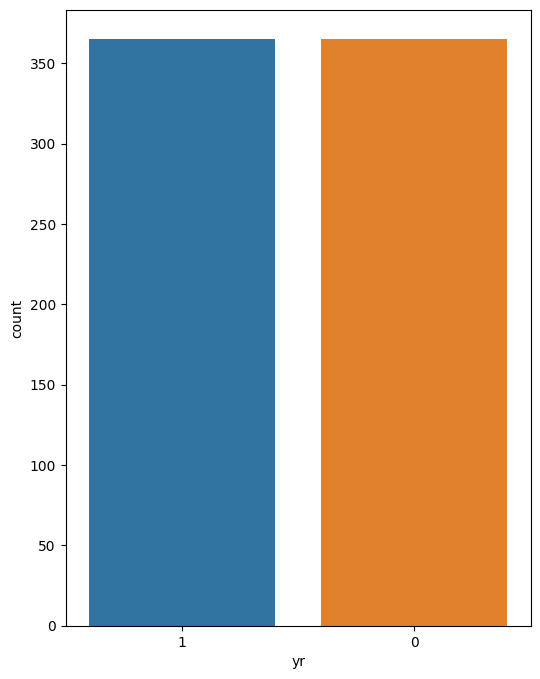

name of column is mnth
['jan' 'feb' 'mar' 'apr' 'may' 'june' 'july' 'aug' 'sep' 'oct' 'nov' 'dec']


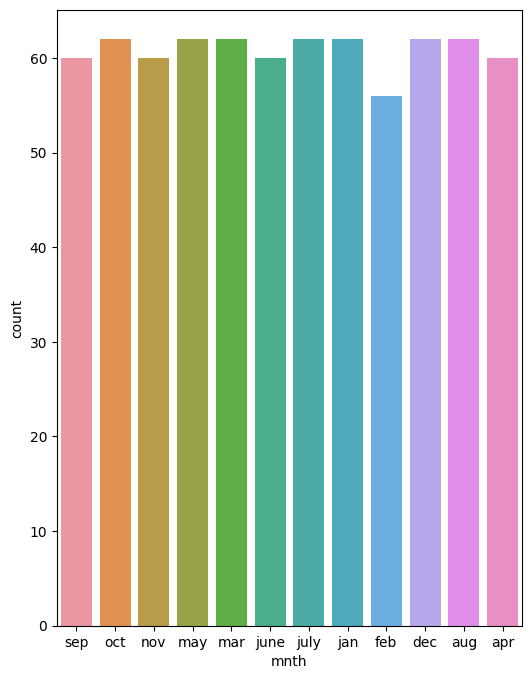

name of column is holiday
[0 1]


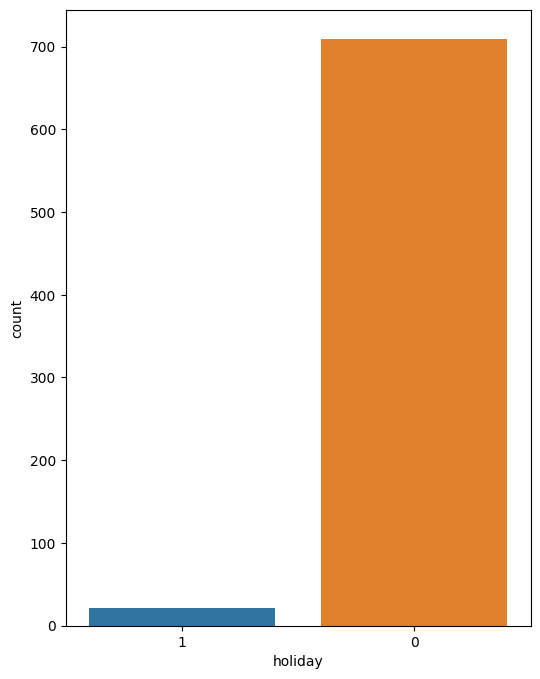

name of column is weekday
[1 2 3 4 5 6 0]


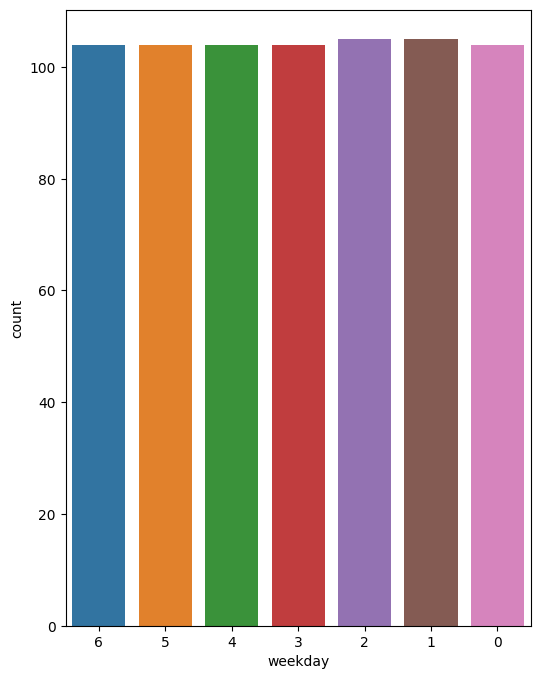

name of column is workingday
[1 0]


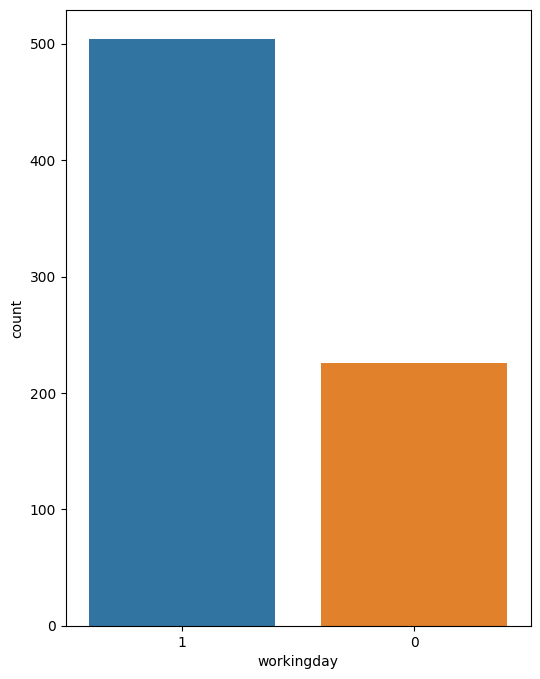

name of column is weathersit
['misty' 'normal' 'light snow or rain']


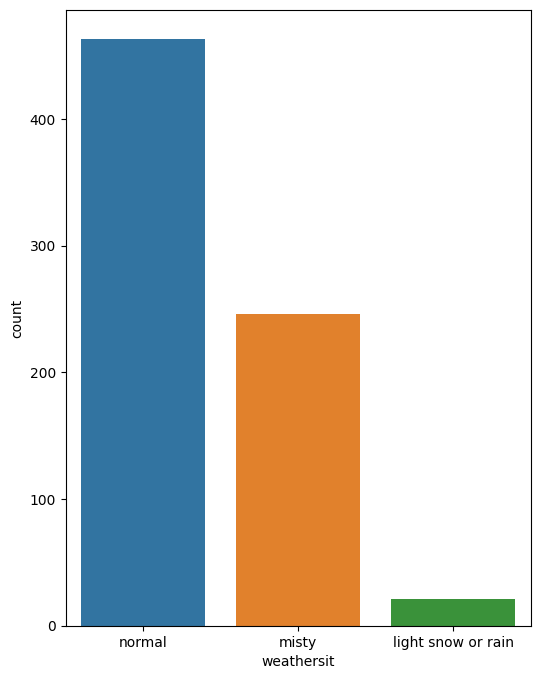

In [3844]:
# cnt is the target variable
# visulaiztion for discrete continous data
def uniquevalues(ty):
  for x in ty.columns:
    # separating the discreet and continous numerical data
    if len(ty[x].unique())<20:
      print(f'name of column is {x}')
      print(ty[x].unique())
      plt.figure(figsize = (6,8))
      sns.countplot(data = ty, x=ty[x], order = sorted(ty[x].unique(), reverse=True))
      plt.show()
    else:
      pass
uniquevalues(df)

###### Data visualization of continous data

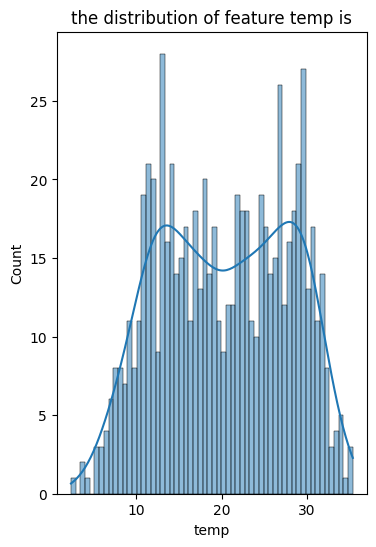

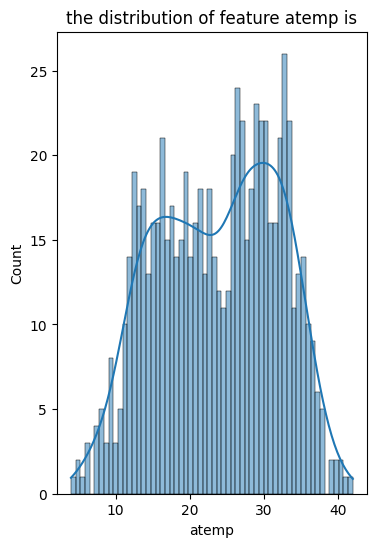

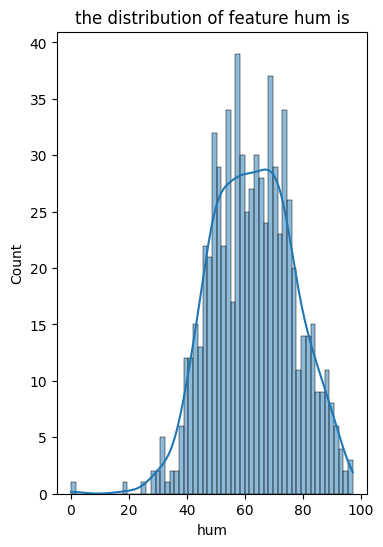

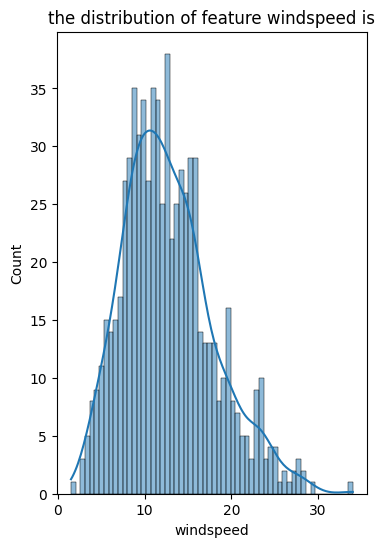

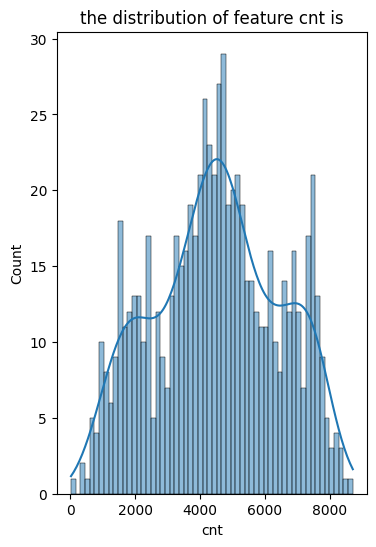

In [3845]:
# visualization for continous data
def plotting(df):
  for x in df.columns:
    if len(df[x].unique())>20:
      plt.figure(figsize = (4,6))
      plt.title(f'the distribution of feature {x} is')
      sns.histplot(data = df, x = df[x], kde = True, bins =60)
    else:
      pass
  return plt.show()
plotting(df)

## Bivariate analysis


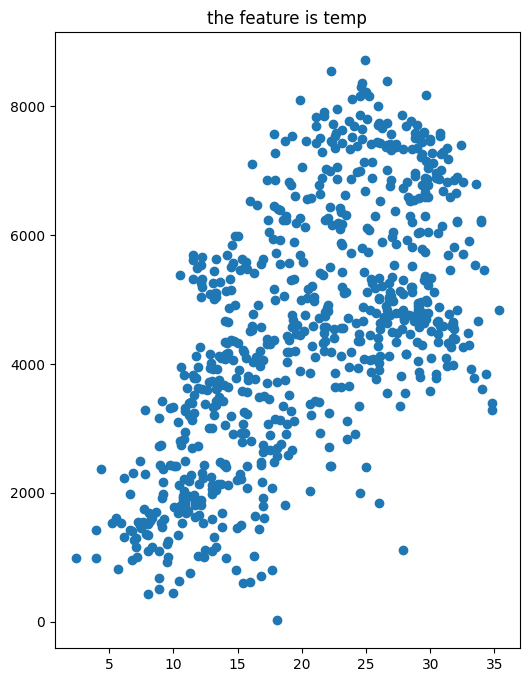

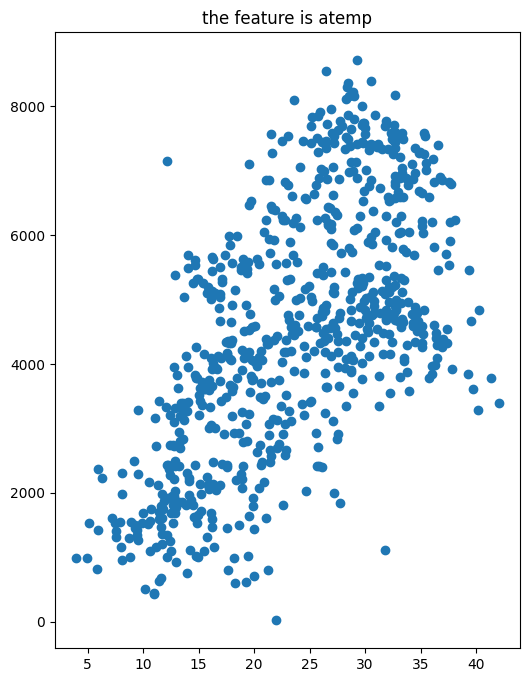

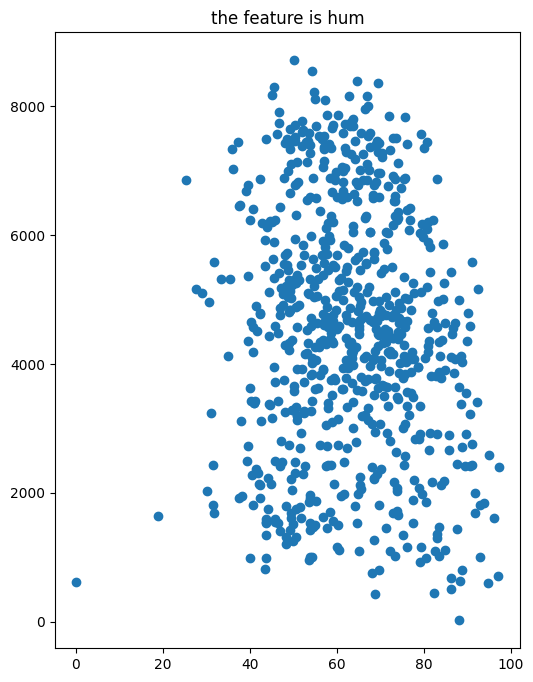

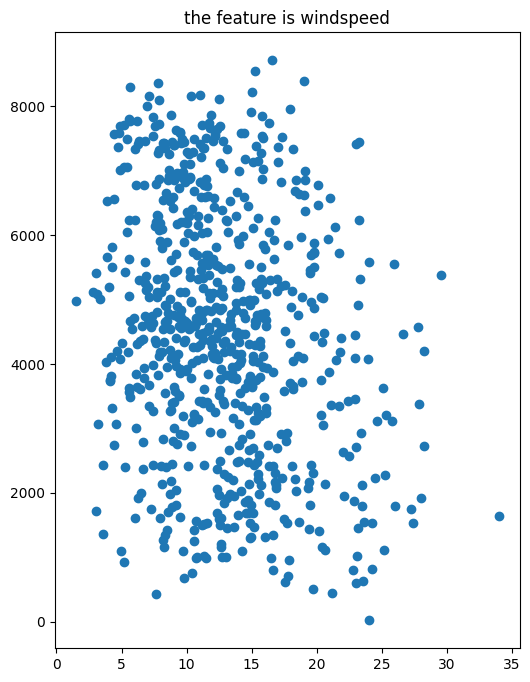

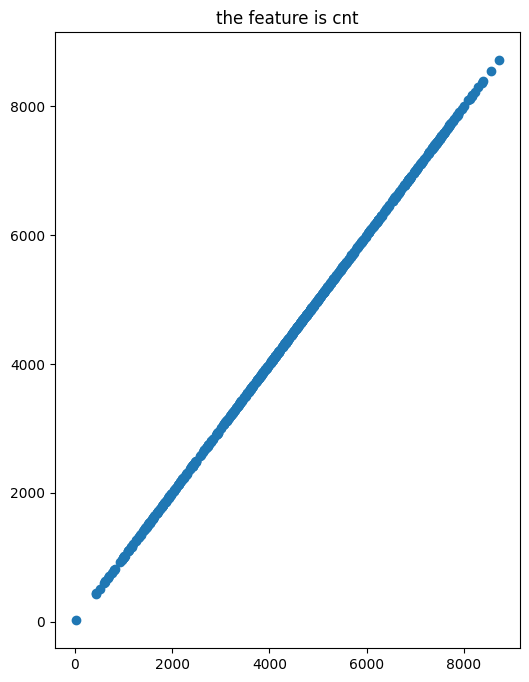

In [3846]:
# bivariate analysis btwn two continous variables
def bivariate(df):
  for col in df:
    if len(df[col].unique()) > 20:
      if pd.api.types.is_numeric_dtype(df[col]):
        plt.figure(figsize = (6,8))
        plt.scatter(y = df['cnt'], x = df[col])
        plt.title(f'the feature is {col}')
      else:
        pass
    else:
      pass
  return plt.show()
bivariate(df)

In [3847]:
# bivariate analysis for continous discrete data
def func(df):
  for col in df:
    if len(df[col].unique())<15:
      plt.figure(figsize = (6,8))
      #plt.bar(df[col], df['cnt']) 
      sns.boxplot(data = df, x=df[col], y=df['cnt'])
      plt.title(f'the feature represented is {col}')
      plt.ylabel('cnt')
    else:
      pass
  return plt.show()
  func(df)

## Multivariate Analysis

In [3848]:
#defining function for multivariate analysis
def funct(data, xvar, yvar,hvar):
  if pd.api.types.is_numeric_dtype(df[xvar]):
    plt.figure(figsize=(6,8))
    sns.scatterplot(data=df, x=xvar, y=yvar, hue=hvar)
  else:
    plt.figure(figsize =(6,8))
    sns.boxplot(data=df, x=xvar, y=yvar, hue=hvar)
    pass
  return plt.show()

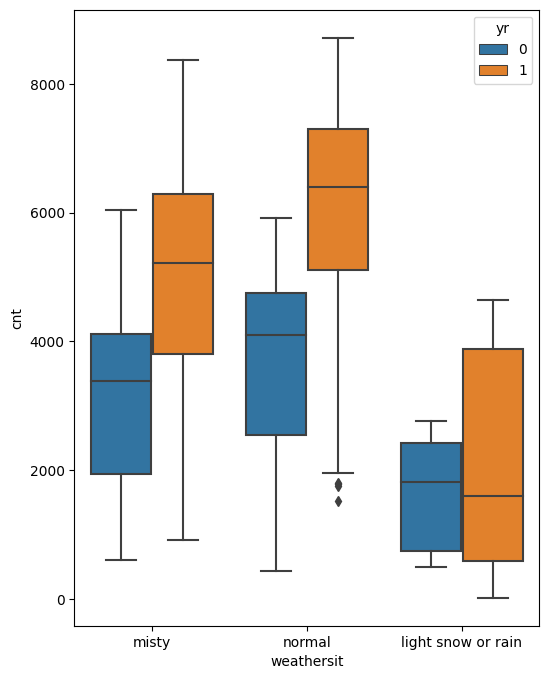

In [3849]:
funct(data=df, xvar='weathersit', yvar='cnt', hvar='yr')

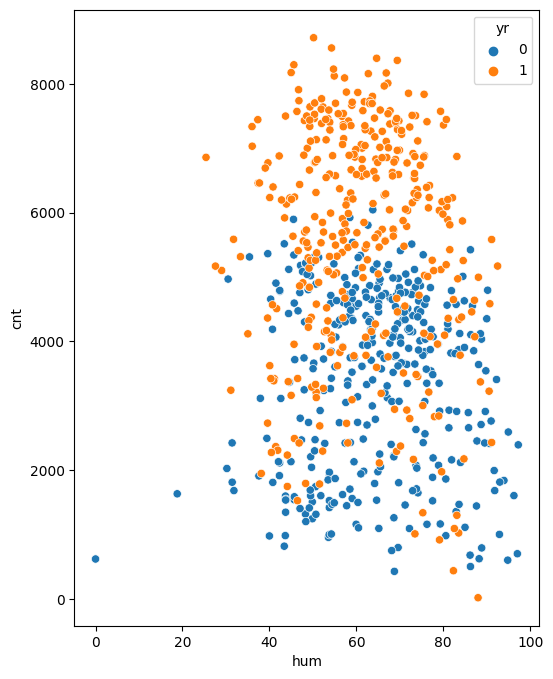

In [3850]:
funct(data=df, xvar='hum', yvar='cnt', hvar='yr')

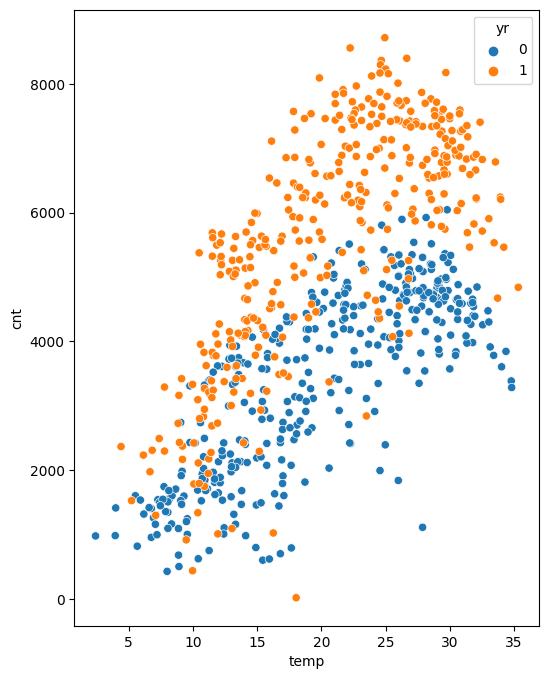

In [3851]:
funct(data=df, xvar='temp',yvar='cnt', hvar='yr')

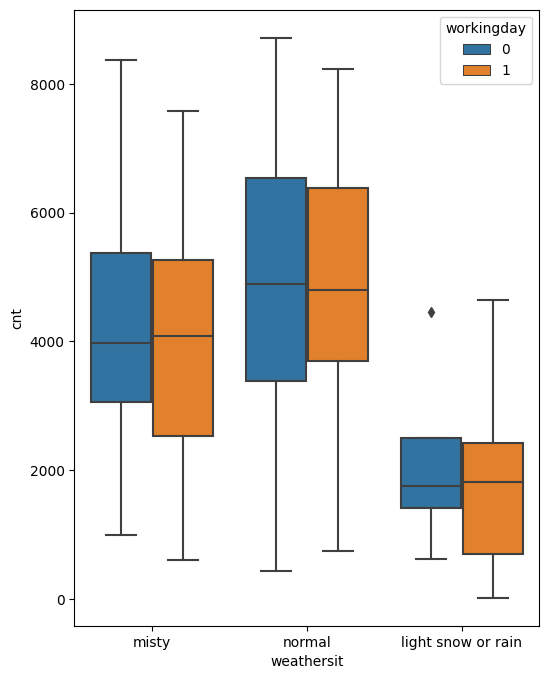

In [3852]:
#if working day yes then '1', else 'no'
funct(data=df, xvar='weathersit', yvar='cnt', hvar='workingday')

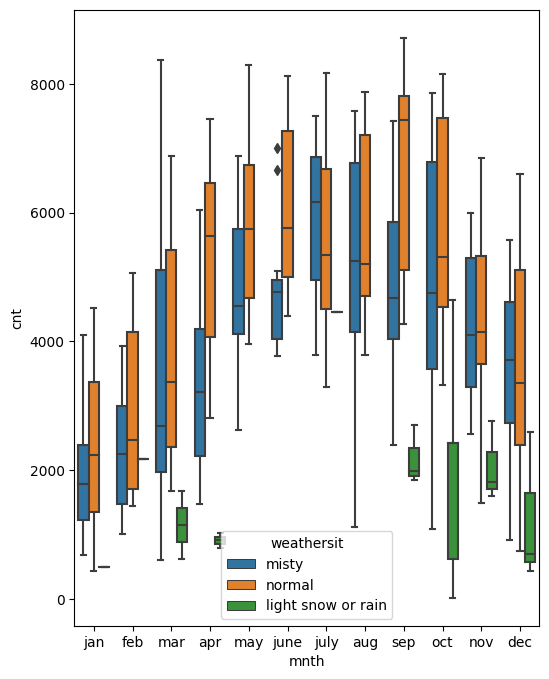

In [3853]:
funct(data=df, xvar='mnth', yvar='cnt', hvar='weathersit')

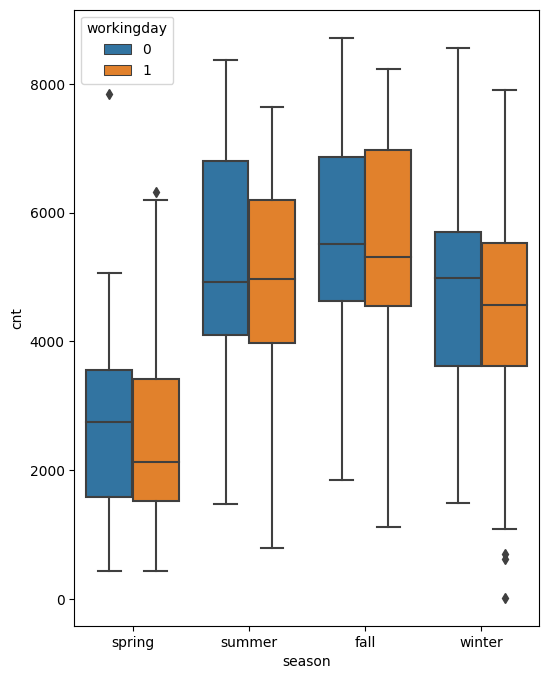

In [3854]:
funct(data=df, xvar='season', yvar='cnt', hvar='workingday')

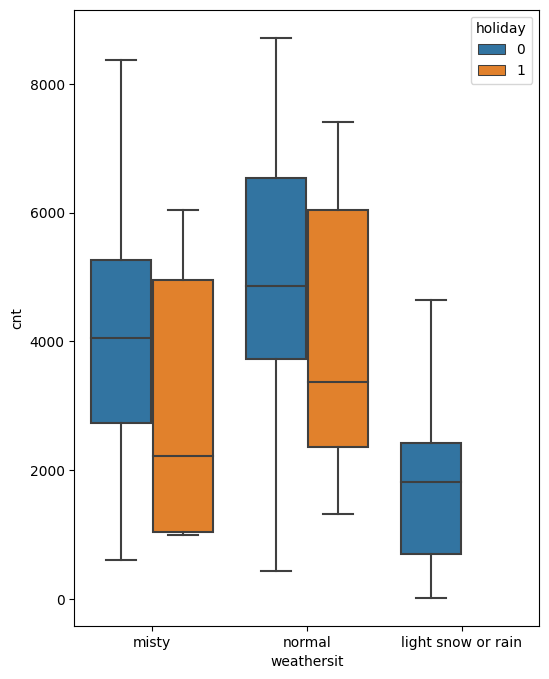

In [3855]:
# o means no holiday, 1 means holiday
funct(data=df, xvar='weathersit', yvar='cnt', hvar='holiday')

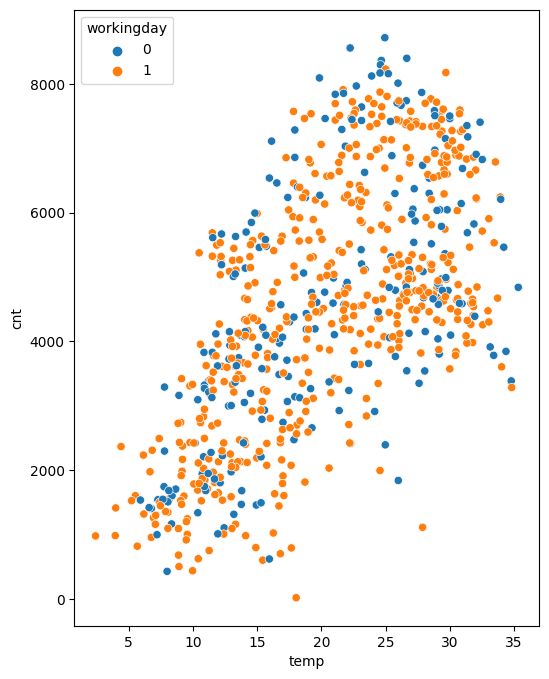

In [3856]:
funct(data=df, xvar='temp', yvar='cnt', hvar='workingday')

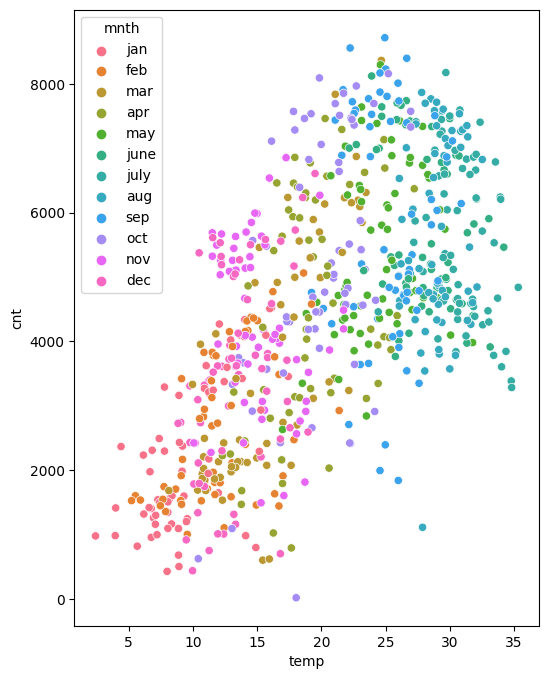

In [3857]:
funct(data=df, xvar='temp', yvar='cnt', hvar='mnth')

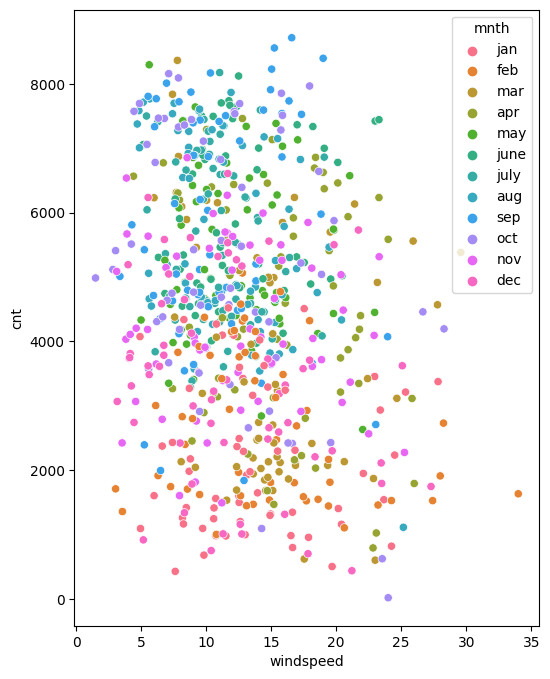

In [3858]:
funct(data=df, xvar='windspeed', yvar='cnt', hvar='mnth')

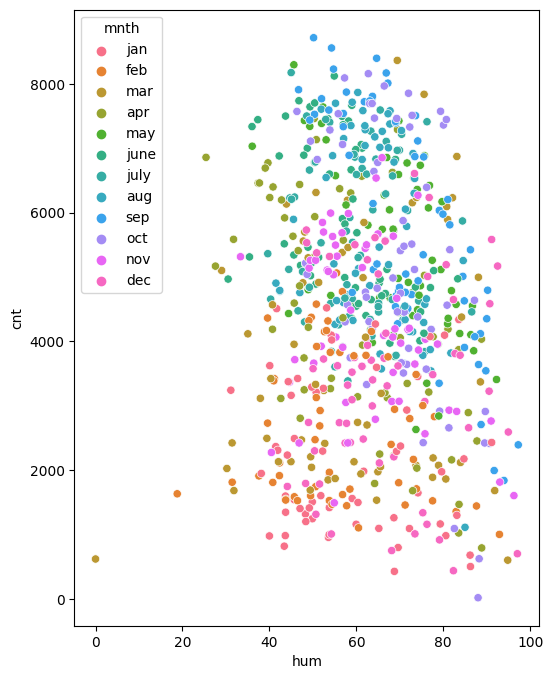

In [3859]:
funct(data=df, xvar='hum', yvar='cnt', hvar='mnth')

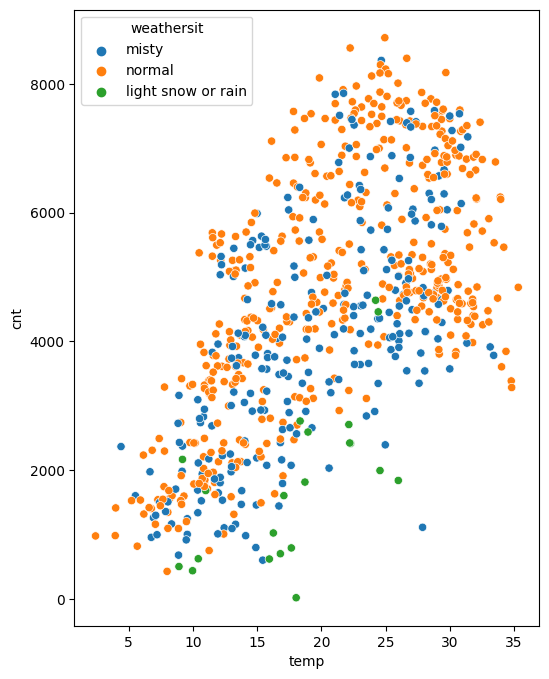

In [3860]:
funct(data=df, xvar='temp', yvar='cnt', hvar='weathersit')

### Plotting pair plot to analyze the correlation btwn variables

<Figure size 1800x2000 with 0 Axes>

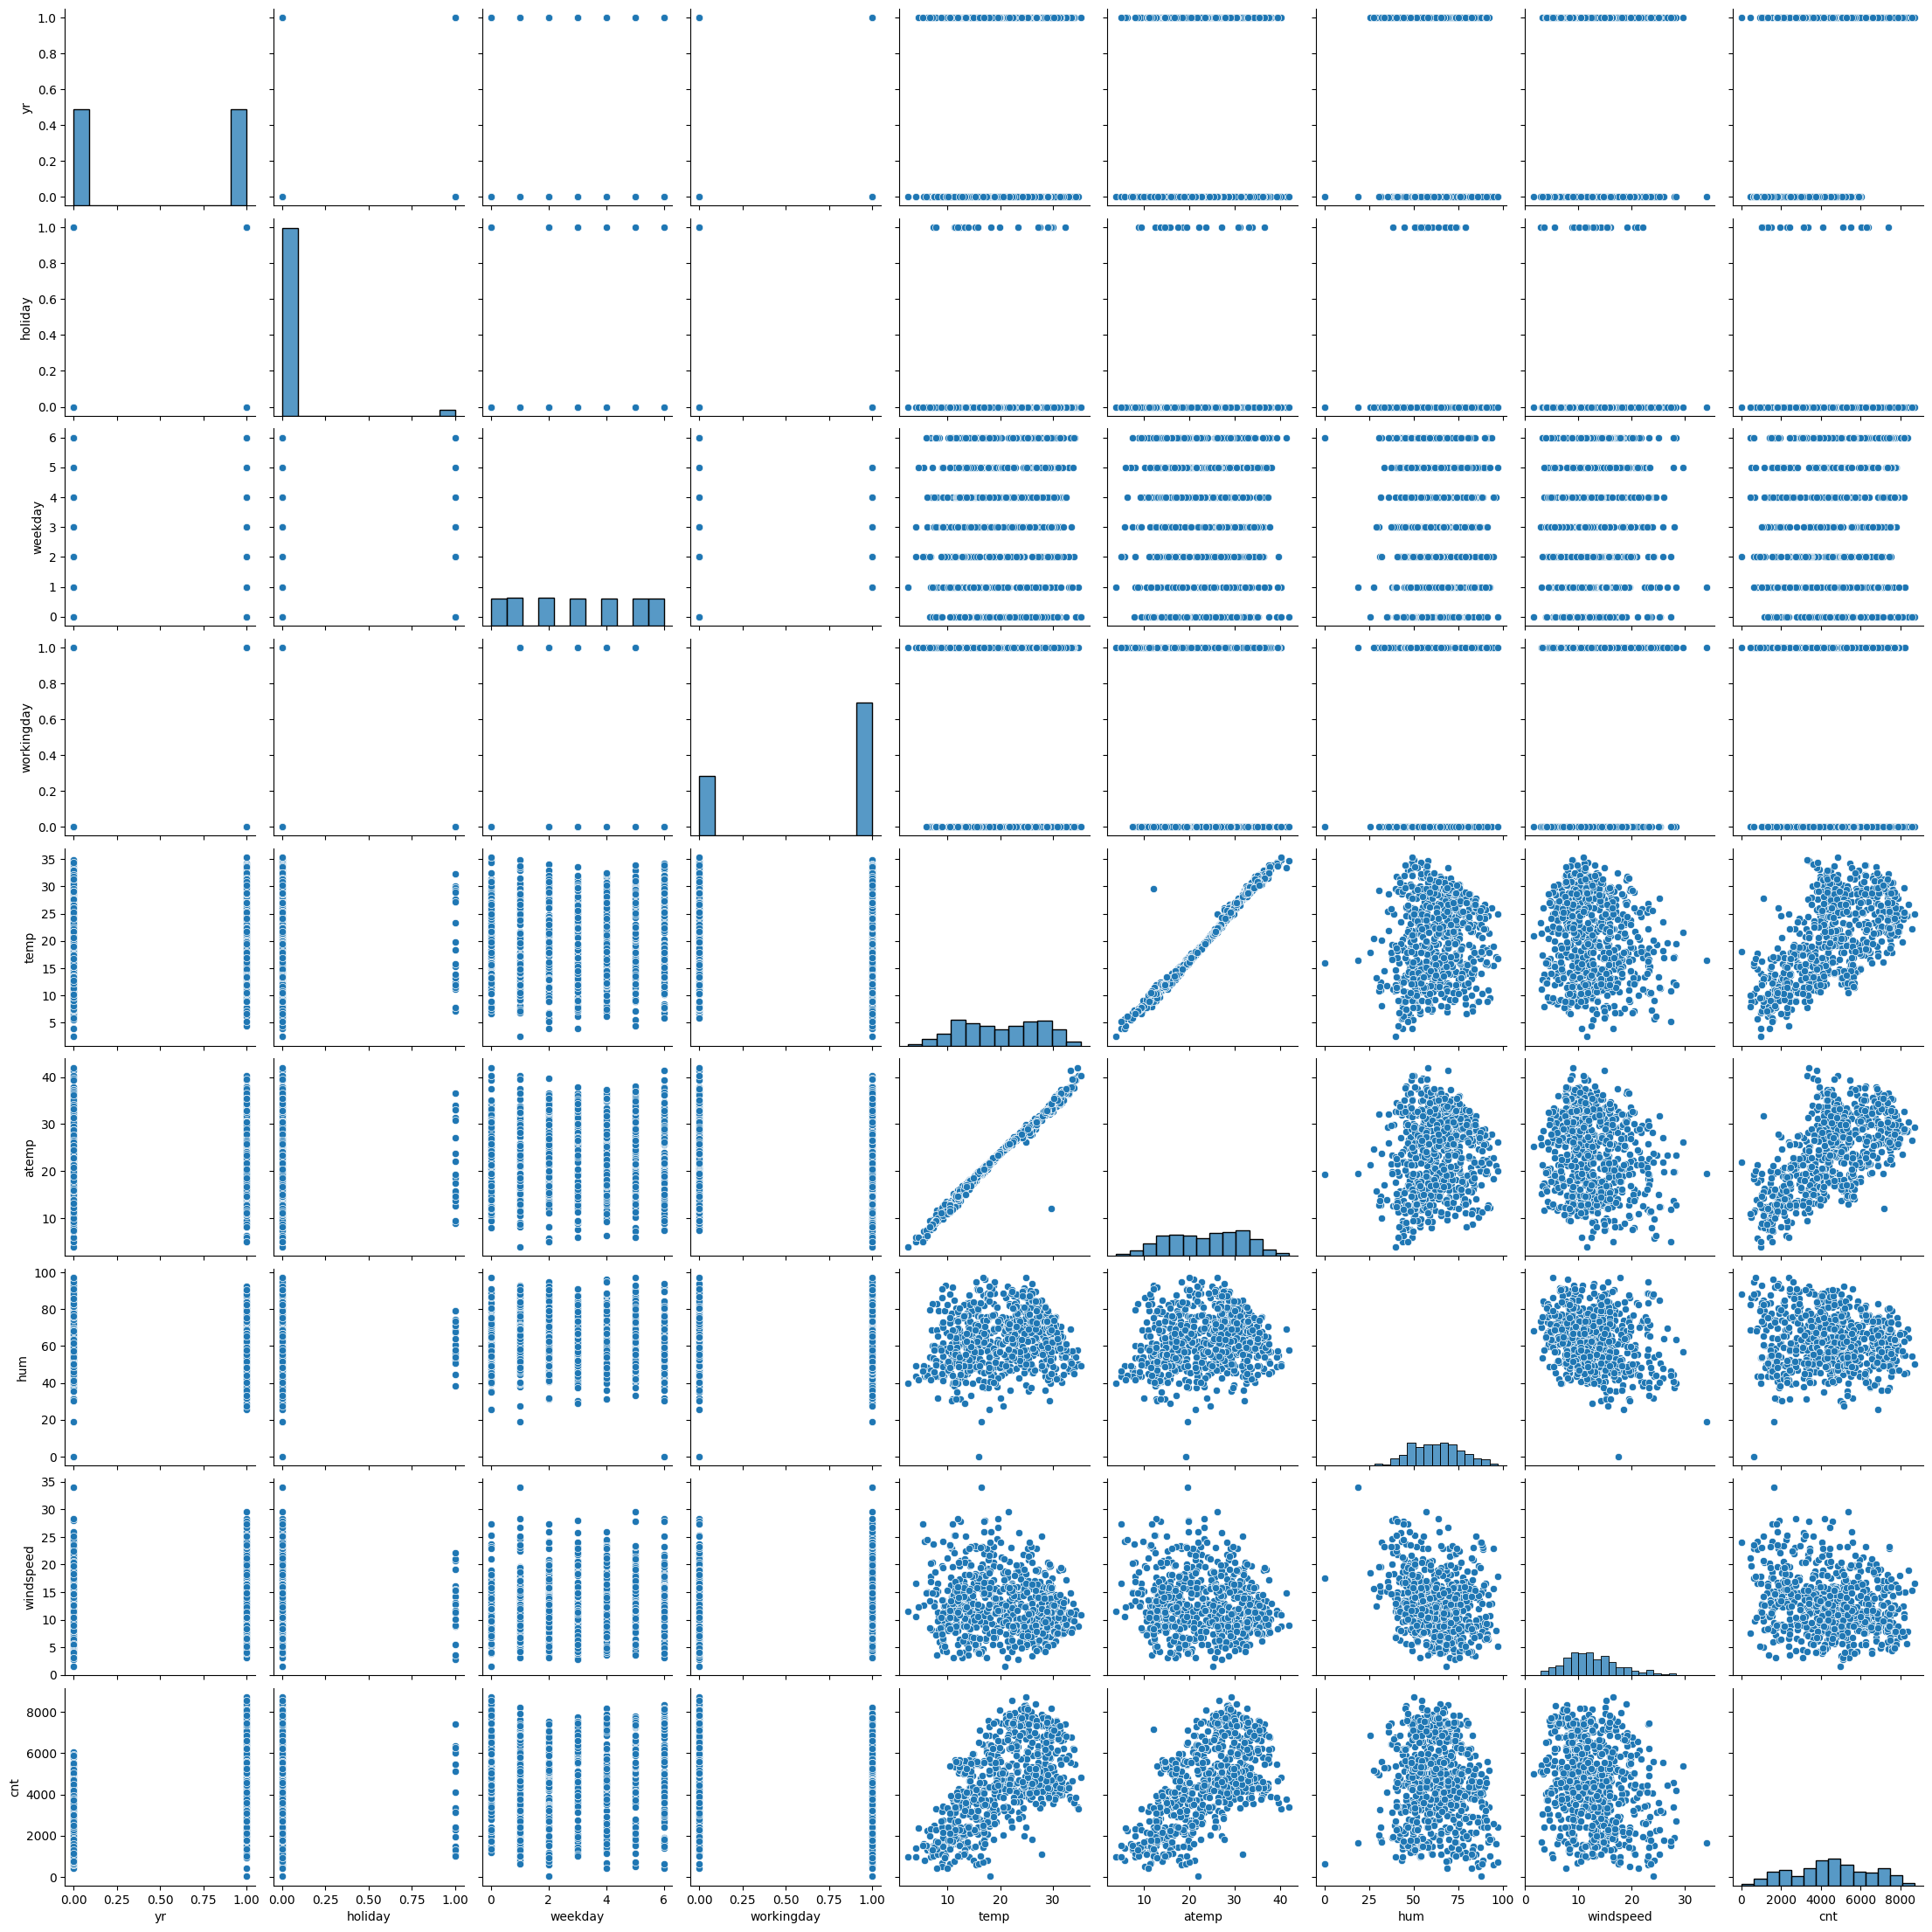

In [3861]:
plt.figure(figsize=(18,20))
sns.pairplot(data=df);

# correlation matrix

<Axes: >

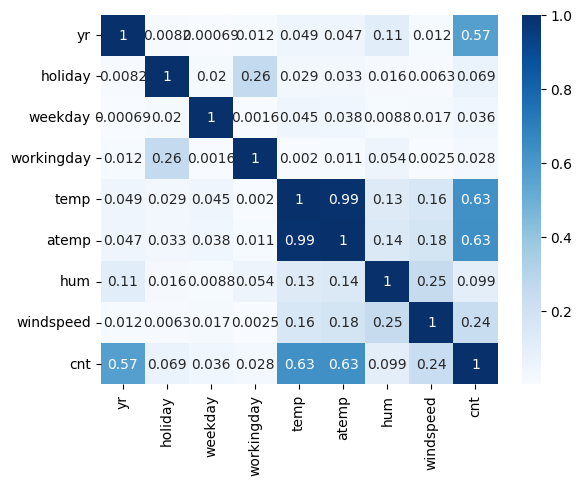

In [3862]:
sns.heatmap(abs(df.corr()), annot=True, cmap='Blues')

In [3863]:
# dropping of variables with high correlation to each other
df = df.drop('atemp', axis =1)

## Data preparation

#### data preparation includes encoding, ie changing categorical to numerical variables

### Encoding

In [3864]:
# creating dummy variables
# changing the datatype to category for the weekday
df['weekday']=df['weekday'].astype('object')

In [3865]:
dummy_df=pd.get_dummies(df[['season','weekday','weathersit','mnth']], drop_first=True)

In [3866]:
# concating the dummy df dataframe to original one
df=pd.concat([df, dummy_df], axis=1)

In [3867]:
df.head()

season  yr mnth  holiday weekday  workingday weathersit       temp  \
0  spring   0  jan        0       1           1      misty  14.110847   
1  spring   0  jan        0       2           1      misty  14.902598   
2  spring   0  jan        0       3           1     normal   8.050924   
3  spring   0  jan        0       4           1     normal   8.200000   
4  spring   0  jan        0       5           1     normal   9.305237   

       hum  windspeed  ...  mnth_dec  mnth_feb  mnth_jan  mnth_july  \
0  80.5833  10.749882  ...         0         0         1          0   
1  69.6087  16.652113  ...         0         0         1          0   
2  43.7273  16.636703  ...         0         0         1          0   
3  59.0435  10.739832  ...         0         0         1          0   
4  43.6957  12.522300  ...         0         0         1          0   

   mnth_june  mnth_mar  mnth_may  mnth_nov  mnth_oct  mnth_sep  
0          0         0         0         0         0         0  
1          0         0         0         0         0         0  
2          0         0         0         0         0         0  
3          0         0         0         0         0         0  
4          0         0         0         0         0         0  

[5 rows x 33 columns]

In [3868]:
#dropping the original columns
df.drop(columns=['season','mnth','weekday','weathersit'], inplace=True)

In [3869]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   yr                 730 non-null    int64  
 1   holiday            730 non-null    int64  
 2   workingday         730 non-null    int64  
 3   temp               730 non-null    float64
 4   hum                730 non-null    float64
 5   windspeed          730 non-null    float64
 6   cnt                730 non-null    int64  
 7   season_spring      730 non-null    uint8  
 8   season_summer      730 non-null    uint8  
 9   season_winter      730 non-null    uint8  
 10  weekday_1          730 non-null    uint8  
 11  weekday_2          730 non-null    uint8  
 12  weekday_3          730 non-null    uint8  
 13  weekday_4          730 non-null    uint8  
 14  weekday_5          730 non-null    uint8  
 15  weekday_6          730 non-null    uint8  
 16  weathersit_misty   730 non

<Axes: >

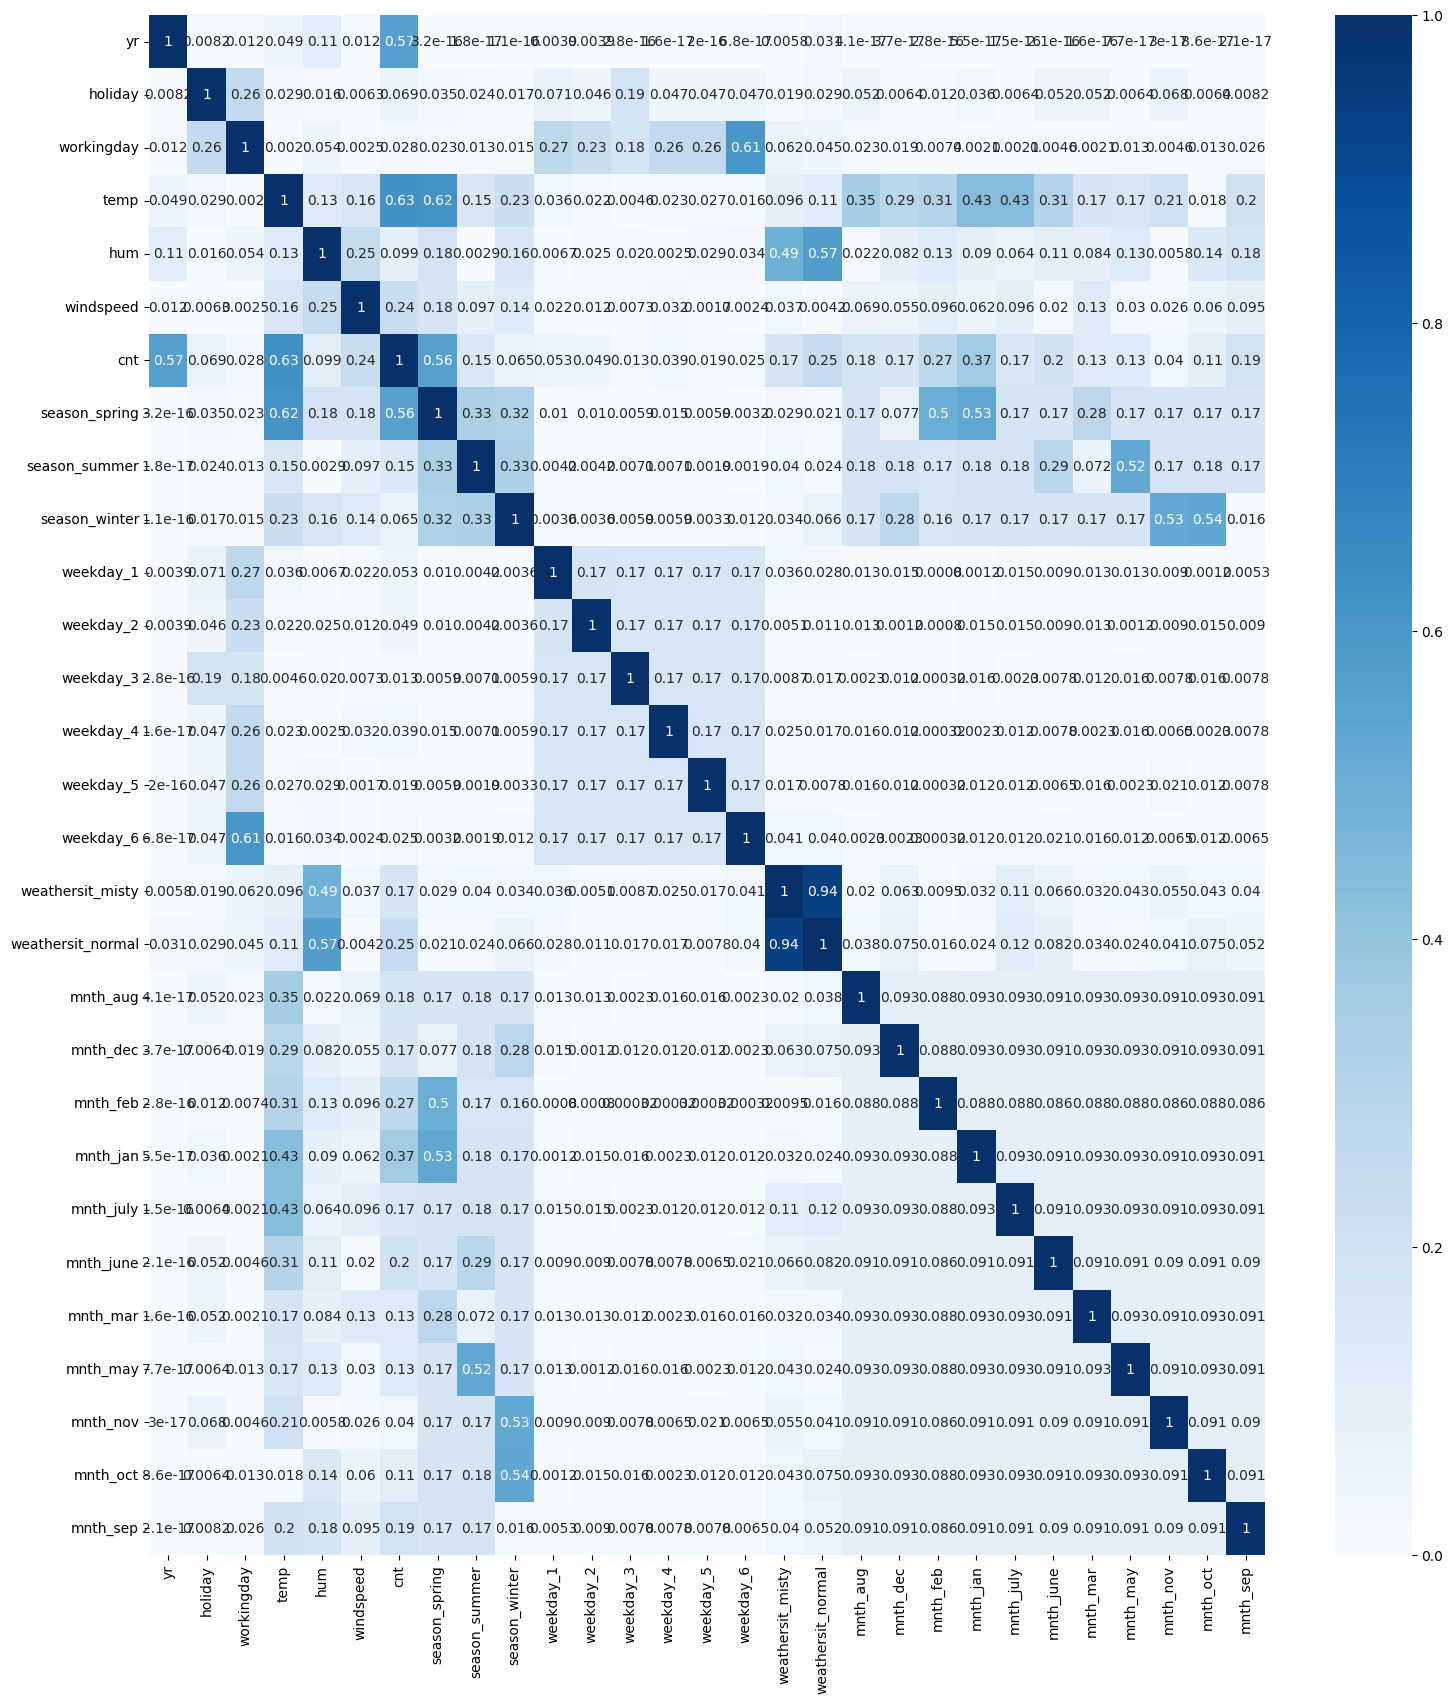

In [3870]:
# correlation matrix of the new dataframe
plt.figure(figsize=(18,20))
sns.heatmap(abs(df.corr()), annot =True, cmap='Blues')

### splitting of the data into training data and testing data

In [3871]:
from sklearn.model_selection import train_test_split

In [3872]:
train_data, test_data = train_test_split(df, train_size=0.7, random_state = True)

### Feature scaling of the numeric columns

In [3873]:
# scaling of features
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
train_data[['temp','windspeed','hum','cnt']] = scaler.fit_transform(train_data[['temp','windspeed','hum','cnt']])
train_data

yr  holiday  workingday      temp       hum  windspeed       cnt  \
135   0        0           1  0.656134  0.743040   0.249252  0.452830   
626   1        0           1  0.624490  0.393272   0.459915  0.870801   
554   1        0           1  0.824902  0.597447   0.378326  0.753221   
311   0        0           1  0.442008  0.650812   0.111281  0.481247   
312   0        0           1  0.431461  0.701856   0.094959  0.470202   
..   ..      ...         ...       ...       ...        ...       ...   
645   1        1           0  0.410364  0.633990   0.399091  0.627704   
715   1        0           1  0.423022  0.908932   0.180992  0.524965   
72    0        0           1  0.336803  0.337991   0.273240  0.232858   
235   0        0           1  0.777436  0.488399   0.550411  0.587667   
37    0        0           1  0.269021  0.674013   0.054910  0.194432   

     season_spring  season_summer  season_winter  ...  mnth_dec  mnth_feb  \
135              0              1              0  ...         0         0   
626              0              0              0  ...         0         0   
554              0              0              0  ...         0         0   
311              0              0              1  ...         0         0   
312              0              0              1  ...         0         0   
..             ...            ...            ...  ...       ...       ...   
645              0              0              1  ...         0         0   
715              0              0              1  ...         1         0   
72               1              0              0  ...         0         0   
235              0              0              0  ...         0         0   
37               1              0              0  ...         0         1   

     mnth_jan  mnth_july  mnth_june  mnth_mar  mnth_may  mnth_nov  mnth_oct  \
135         0          0          0         0         1         0         0   
626         0          0          0         0         0         0         0   
554         0          1          0         0         0         0         0   
311         0          0          0         0         0         1         0   
312         0          0          0         0         0         1         0   
..        ...        ...        ...       ...       ...       ...       ...   
645         0          0          0         0         0         0         1   
715         0          0          0         0         0         0         0   
72          0          0          0         1         0         0         0   
235         0          0          0         0         0         0         0   
37          0          0          0         0         0         0         0   

     mnth_sep  
135         0  
626         1  
554         0  
311         0  
312         0  
..        ...  
645         0  
715         0  
72          0  
235         0  
37          0  

[510 rows x 29 columns]

In [3874]:
# separating y and x training data sets
y_train = train_data.pop('cnt')
X_train = train_data

In [3875]:
X_train

yr  holiday  workingday      temp       hum  windspeed  season_spring  \
135   0        0           1  0.656134  0.743040   0.249252              0   
626   1        0           1  0.624490  0.393272   0.459915              0   
554   1        0           1  0.824902  0.597447   0.378326              0   
311   0        0           1  0.442008  0.650812   0.111281              0   
312   0        0           1  0.431461  0.701856   0.094959              0   
..   ..      ...         ...       ...       ...        ...            ...   
645   1        1           0  0.410364  0.633990   0.399091              0   
715   1        0           1  0.423022  0.908932   0.180992              0   
72    0        0           1  0.336803  0.337991   0.273240              1   
235   0        0           1  0.777436  0.488399   0.550411              0   
37    0        0           1  0.269021  0.674013   0.054910              1   

     season_summer  season_winter  weekday_1  ...  mnth_dec  mnth_feb  \
135              1              0          0  ...         0         0   
626              0              0          0  ...         0         0   
554              0              0          0  ...         0         0   
311              0              1          0  ...         0         0   
312              0              1          0  ...         0         0   
..             ...            ...        ...  ...       ...       ...   
645              0              1          0  ...         0         0   
715              0              1          0  ...         1         0   
72               0              0          0  ...         0         0   
235              0              0          0  ...         0         0   
37               0              0          0  ...         0         1   

     mnth_jan  mnth_july  mnth_june  mnth_mar  mnth_may  mnth_nov  mnth_oct  \
135         0          0          0         0         1         0         0   
626         0          0          0         0         0         0         0   
554         0          1          0         0         0         0         0   
311         0          0          0         0         0         1         0   
312         0          0          0         0         0         1         0   
..        ...        ...        ...       ...       ...       ...       ...   
645         0          0          0         0         0         0         1   
715         0          0          0         0         0         0         0   
72          0          0          0         1         0         0         0   
235         0          0          0         0         0         0         0   
37          0          0          0         0         0         0         0   

     mnth_sep  
135         0  
626         1  
554         0  
311         0  
312         0  
..        ...  
645         0  
715         0  
72          0  
235         0  
37          0  

[510 rows x 28 columns]

### Feature selection using RFE(REcursive Feature Elimination)

In [3876]:
# feature selection using rfe
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [3877]:
# selecting 25 number of features using RFE
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select = 25 )
rfe = rfe.fit(X_train, y_train)

In [3878]:
# all selected features will be given rank 1 followed by the not selected top feature as 2 and so on
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weekday_1', False, 2),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', True, 1),
 ('weathersit_misty', True, 1),
 ('weathersit_normal', True, 1),
 ('mnth_aug', False, 4),
 ('mnth_dec', True, 1),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_july', True, 1),
 ('mnth_june', False, 3),
 ('mnth_mar', True, 1),
 ('mnth_may', True, 1),
 ('mnth_nov', True, 1),
 ('mnth_oct', True, 1),
 ('mnth_sep', True, 1)]

In [3879]:
# making a dataframe based on the selected features
rfe_col = X_train.columns[rfe.support_]
rfe_df = X_train[rfe_col]
rfe_df.shape

(510, 25)

In [3880]:
# function to use rfe using stats model
import statsmodels.api as sm
def func(rfe_col):  
  x_train_sm = sm.add_constant(X_train[rfe_col])
  lm = sm.OLS(y_train, x_train_sm)
  lm_model = lm.fit()
  return lm_model.summary()

###### Checking the multicollinearity using vif value (Variance Inflation Factor)

In [3881]:
# checking vif values after each model is a good practice
# function to chcek vif
def vif_for_x_rfe(x_rfe_train):
  from statsmodels.stats.outliers_influence import variance_inflation_factor
  vif = pd.DataFrame()
  vif['features'] = x_rfe_train.columns
  vif['VIF'] = [variance_inflation_factor(x_rfe_train.values, i) for i in range(x_rfe_train.shape[1])]
  vif = vif.sort_values(by= ['VIF'], ascending = False)
  return round(vif,2)

###### Model using RFE

In [3882]:
print(func(rfe_col))
vif_for_x_rfe(X_train[rfe_col])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     98.54
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          4.37e-172
Time:                        18:06:06   Log-Likelihood:                 512.35
No. Observations:                 510   AIC:                            -972.7
Df Residuals:                     484   BIC:                            -862.6
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1480      0.05

features    VIF
3                temp  29.88
15  weathersit_normal  19.25
4                 hum  14.93
6       season_spring  10.67
8       season_winter  10.60
2          workingday   9.93
14   weathersit_misty   8.88
22           mnth_nov   6.08
5           windspeed   5.59
18           mnth_jan   5.58
23           mnth_oct   4.79
17           mnth_feb   4.77
16           mnth_dec   4.17
7       season_summer   4.14
20           mnth_mar   2.50
0                  yr   2.11
10          weekday_3   2.09
11          weekday_4   2.06
12          weekday_5   2.02
9           weekday_2   2.01
13          weekday_6   2.00
24           mnth_sep   1.95
19          mnth_july   1.86
21           mnth_may   1.67
1             holiday   1.48

###### Model 1 after dropping the insignificant 'weekday_2'

In [3883]:
rfe_col = rfe_col.drop('weekday_2')
print(func(rfe_col))
vif_for_x_rfe(X_train[rfe_col])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     102.8
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          4.84e-173
Time:                        18:06:06   Log-Likelihood:                 512.22
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     485   BIC:                            -868.6
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1458      0.05

features    VIF
3                temp  29.88
14  weathersit_normal  19.25
4                 hum  14.93
6       season_spring  10.64
8       season_winter  10.59
13   weathersit_misty   8.87
2          workingday   7.77
21           mnth_nov   6.08
5           windspeed   5.59
17           mnth_jan   5.56
22           mnth_oct   4.78
16           mnth_feb   4.76
15           mnth_dec   4.17
7       season_summer   4.13
19           mnth_mar   2.49
0                  yr   2.11
12          weekday_6   2.00
23           mnth_sep   1.95
18          mnth_july   1.86
20           mnth_may   1.67
9           weekday_3   1.57
10          weekday_4   1.56
11          weekday_5   1.55
1             holiday   1.35

###### Model 2 after dropping the insignificant 'weekday_3'

In [3884]:
rfe_col = rfe_col.drop('weekday_3')
print(func(rfe_col))
vif_for_x_rfe(X_train[rfe_col])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     107.4
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          4.99e-174
Time:                        18:06:06   Log-Likelihood:                 512.14
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     486   BIC:                            -874.6
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1447      0.05

features    VIF
3                temp  29.77
13  weathersit_normal  19.23
4                 hum  14.92
8       season_winter  10.55
6       season_spring  10.54
12   weathersit_misty   8.87
2          workingday   7.07
20           mnth_nov   6.06
5           windspeed   5.59
16           mnth_jan   5.50
21           mnth_oct   4.77
15           mnth_feb   4.70
14           mnth_dec   4.15
7       season_summer   4.13
18           mnth_mar   2.48
0                  yr   2.10
11          weekday_6   2.00
22           mnth_sep   1.95
17          mnth_july   1.86
19           mnth_may   1.67
9           weekday_4   1.38
10          weekday_5   1.38
1             holiday   1.25

###### Model 3 after dropping the insignificant 'mnth feb'

In [3885]:
rfe_col = rfe_col.drop('mnth_feb')
print(func(rfe_col))
vif_for_x_rfe(X_train[rfe_col])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     112.4
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          6.39e-175
Time:                        18:06:06   Log-Likelihood:                 511.80
No. Observations:                 510   AIC:                            -977.6
Df Residuals:                     487   BIC:                            -880.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1326      0.04

features    VIF
3                temp  26.36
13  weathersit_normal  17.87
4                 hum  14.17
8       season_winter   9.30
12   weathersit_misty   8.49
2          workingday   7.06
6       season_spring   5.71
5           windspeed   5.51
19           mnth_nov   4.75
7       season_summer   4.13
20           mnth_oct   3.91
14           mnth_dec   2.61
0                  yr   2.08
15           mnth_jan   2.00
11          weekday_6   1.99
16          mnth_july   1.86
21           mnth_sep   1.83
18           mnth_may   1.64
17           mnth_mar   1.38
9           weekday_4   1.38
10          weekday_5   1.37
1             holiday   1.25

###### Model 4 after dropping the insignificant 'mnth dec'

In [3886]:
rfe_col = rfe_col.drop('mnth_dec')
print(func(rfe_col))
vif_for_x_rfe(X_train[rfe_col])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     117.8
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          8.02e-176
Time:                        18:06:06   Log-Likelihood:                 511.46
No. Observations:                 510   AIC:                            -978.9
Df Residuals:                     488   BIC:                            -885.8
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1236      0.04

features    VIF
3                temp  24.81
13  weathersit_normal  17.24
4                 hum  13.26
12   weathersit_misty   8.35
2          workingday   7.04
8       season_winter   6.42
6       season_spring   5.71
5           windspeed   5.51
7       season_summer   4.02
18           mnth_nov   2.61
19           mnth_oct   2.32
0                  yr   2.07
11          weekday_6   1.97
15          mnth_july   1.85
14           mnth_jan   1.81
17           mnth_may   1.64
20           mnth_sep   1.58
9           weekday_4   1.38
10          weekday_5   1.37
16           mnth_mar   1.34
1             holiday   1.24

###### Model 5 after dropping the insignificant 'mnth nov'

In [3887]:
rfe_col = rfe_col.drop('mnth_nov')
print(func(rfe_col))
vif_for_x_rfe(X_train[rfe_col])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     123.9
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          7.11e-177
Time:                        18:06:07   Log-Likelihood:                 511.46
No. Observations:                 510   AIC:                            -980.9
Df Residuals:                     489   BIC:                            -892.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1234      0.04

features    VIF
3                temp  24.67
13  weathersit_normal  17.15
4                 hum  13.23
12   weathersit_misty   8.35
2          workingday   7.04
6       season_spring   5.62
5           windspeed   5.44
8       season_winter   4.77
7       season_summer   3.96
0                  yr   2.07
11          weekday_6   1.97
15          mnth_july   1.85
14           mnth_jan   1.81
17           mnth_may   1.64
18           mnth_oct   1.58
19           mnth_sep   1.48
9           weekday_4   1.38
10          weekday_5   1.36
16           mnth_mar   1.34
1             holiday   1.23

###### Model 6 after dropping the insignificant 'mnth july'

In [3888]:
rfe_col = rfe_col.drop('mnth_july')
print(func(rfe_col))
vif_for_x_rfe(X_train[rfe_col])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     129.9
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          2.18e-177
Time:                        18:06:07   Log-Likelihood:                 510.13
No. Observations:                 510   AIC:                            -980.3
Df Residuals:                     490   BIC:                            -895.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1154      0.04

features    VIF
3                temp  22.90
13  weathersit_normal  17.15
4                 hum  13.23
12   weathersit_misty   8.35
2          workingday   7.01
6       season_spring   5.47
5           windspeed   5.43
8       season_winter   4.60
7       season_summer   3.48
0                  yr   2.07
11          weekday_6   1.97
14           mnth_jan   1.81
16           mnth_may   1.63
17           mnth_oct   1.56
9           weekday_4   1.37
10          weekday_5   1.36
15           mnth_mar   1.34
18           mnth_sep   1.31
1             holiday   1.23

###### Model 7 after dropping the insignificant 'mnth jan'

In [3889]:
rfe_col = rfe_col.drop('mnth_jan')
print(func(rfe_col))
vif_for_x_rfe(X_train[rfe_col])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     136.9
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          3.93e-178
Time:                        18:06:07   Log-Likelihood:                 509.33
No. Observations:                 510   AIC:                            -980.7
Df Residuals:                     491   BIC:                            -900.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1083      0.04

features    VIF
3                temp  22.18
13  weathersit_normal  16.82
4                 hum  13.08
12   weathersit_misty   8.20
2          workingday   7.01
5           windspeed   5.43
6       season_spring   5.07
8       season_winter   4.54
7       season_summer   3.48
0                  yr   2.07
11          weekday_6   1.97
15           mnth_may   1.63
16           mnth_oct   1.56
9           weekday_4   1.37
10          weekday_5   1.36
17           mnth_sep   1.31
14           mnth_mar   1.23
1             holiday   1.23

###### Model 8 after dropping the insignificant 'weekday 6'

In [3890]:
rfe_col = rfe_col.drop('weekday_6')
print(func(rfe_col))
vif_for_x_rfe(X_train[rfe_col])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     144.2
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          1.31e-178
Time:                        18:06:07   Log-Likelihood:                 507.86
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     492   BIC:                            -903.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0926      0.04

features    VIF
3                temp  21.95
12  weathersit_normal  16.42
4                 hum  12.87
11   weathersit_misty   8.11
5           windspeed   5.43
6       season_spring   5.02
8       season_winter   4.49
2          workingday   4.42
7       season_summer   3.47
0                  yr   2.07
14           mnth_may   1.63
15           mnth_oct   1.56
9           weekday_4   1.37
10          weekday_5   1.36
16           mnth_sep   1.31
13           mnth_mar   1.23
1             holiday   1.14

###### Model 9 after dropping the insignificant 'weekday_5'

In [3891]:
rfe_col = rfe_col.drop('weekday_5')
print(func(rfe_col))
vif_for_x_rfe(X_train[rfe_col])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     152.2
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          5.96e-179
Time:                        18:06:07   Log-Likelihood:                 506.05
No. Observations:                 510   AIC:                            -978.1
Df Residuals:                     493   BIC:                            -906.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0970      0.04

features    VIF
3                temp  21.73
11  weathersit_normal  16.19
4                 hum  12.87
10   weathersit_misty   7.98
5           windspeed   5.42
6       season_spring   4.99
8       season_winter   4.47
2          workingday   3.98
7       season_summer   3.46
0                  yr   2.07
13           mnth_may   1.63
14           mnth_oct   1.56
15           mnth_sep   1.31
9           weekday_4   1.28
12           mnth_mar   1.23
1             holiday   1.13

###### Model 10 after dropping the insignificant 'weekday_4'

In [3892]:
rfe_col = rfe_col.drop('weekday_4')
print(func(rfe_col))
vif_for_x_rfe(X_train[rfe_col])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     161.5
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          2.07e-179
Time:                        18:06:08   Log-Likelihood:                 504.49
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     494   BIC:                            -909.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0966      0.04

features    VIF
3                temp  21.62
10  weathersit_normal  16.18
4                 hum  12.82
9    weathersit_misty   7.97
5           windspeed   5.41
6       season_spring   4.97
8       season_winter   4.47
2          workingday   3.72
7       season_summer   3.46
0                  yr   2.07
12           mnth_may   1.63
13           mnth_oct   1.56
14           mnth_sep   1.31
11           mnth_mar   1.23
1             holiday   1.13

###### Model 11

In [3893]:
rfe_col = rfe_col.drop('hum')
print(func(rfe_col))
vif_for_x_rfe(X_train[rfe_col])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     163.4
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          2.84e-175
Time:                        18:06:08   Log-Likelihood:                 491.93
No. Observations:                 510   AIC:                            -953.9
Df Residuals:                     495   BIC:                            -890.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0313      0.03

features    VIF
9   weathersit_normal  15.31
3                temp  13.66
8    weathersit_misty   7.94
4           windspeed   5.37
5       season_spring   3.80
2          workingday   3.66
7       season_winter   3.24
6       season_summer   3.12
0                  yr   2.03
11           mnth_may   1.63
12           mnth_oct   1.55
13           mnth_sep   1.25
10           mnth_mar   1.23
1             holiday   1.13

###### Model 12

In [3894]:
rfe_col = rfe_col.drop('mnth_may')
print(func(rfe_col))
vif_for_x_rfe(X_train[rfe_col])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     175.4
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          6.19e-176
Time:                        18:06:08   Log-Likelihood:                 490.81
No. Observations:                 510   AIC:                            -953.6
Df Residuals:                     496   BIC:                            -894.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0389      0.03

features    VIF
9   weathersit_normal  15.23
3                temp  13.43
8    weathersit_misty   7.92
4           windspeed   5.29
5       season_spring   3.74
2          workingday   3.66
7       season_winter   3.23
6       season_summer   2.39
0                  yr   2.03
11           mnth_oct   1.55
12           mnth_sep   1.25
10           mnth_mar   1.19
1             holiday   1.13

###### Model 13

In [3895]:
rfe_col = rfe_col.drop('windspeed')
print(func(rfe_col))
vif_for_x_rfe(X_train[rfe_col])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     177.8
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          4.30e-171
Time:                        18:06:08   Log-Likelihood:                 476.59
No. Observations:                 510   AIC:                            -927.2
Df Residuals:                     497   BIC:                            -872.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1100      0.03

features    VIF
8   weathersit_normal  15.07
3                temp  12.81
7    weathersit_misty   7.85
2          workingday   3.64
4       season_spring   3.36
6       season_winter   3.12
5       season_summer   2.24
0                  yr   2.03
10           mnth_oct   1.55
11           mnth_sep   1.25
9            mnth_mar   1.19
1             holiday   1.13

###### Model 14

In [3896]:
rfe_col = rfe_col.drop('season_spring')
print(func(rfe_col))
vif_for_x_rfe(X_train[rfe_col])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     186.0
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          2.02e-168
Time:                        18:06:08   Log-Likelihood:                 467.53
No. Observations:                 510   AIC:                            -911.1
Df Residuals:                     498   BIC:                            -860.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.2157      0.02

features   VIF
3                temp  7.71
7   weathersit_normal  7.42
6    weathersit_misty  3.91
2          workingday  3.53
5       season_winter  2.08
0                  yr  2.02
4       season_summer  1.62
9            mnth_oct  1.54
10           mnth_sep  1.23
8            mnth_mar  1.14
1             holiday  1.13

###### Model 15

In [3897]:
rfe_col = rfe_col.drop('mnth_mar')
print(func(rfe_col))
vif_for_x_rfe(X_train[rfe_col])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     203.1
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          8.64e-169
Time:                        18:06:08   Log-Likelihood:                 465.65
No. Observations:                 510   AIC:                            -909.3
Df Residuals:                     499   BIC:                            -862.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.2094      0.02

features   VIF
3               temp  7.54
7  weathersit_normal  7.20
6   weathersit_misty  3.81
2         workingday  3.51
5      season_winter  2.04
0                 yr  2.01
4      season_summer  1.62
8           mnth_oct  1.54
9           mnth_sep  1.23
1            holiday  1.12

###### Model 16

In [3898]:
rfe_col = rfe_col.drop('workingday')
print(func(rfe_col))
vif_for_x_rfe(X_train[rfe_col])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     222.7
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          1.14e-168
Time:                        18:06:08   Log-Likelihood:                 462.55
No. Observations:                 510   AIC:                            -905.1
Df Residuals:                     500   BIC:                            -862.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.2287      0.02

features   VIF
2               temp  7.42
6  weathersit_normal  6.23
5   weathersit_misty  3.36
4      season_winter  2.02
0                 yr  2.01
3      season_summer  1.62
7           mnth_oct  1.54
8           mnth_sep  1.23
1            holiday  1.04

###### Model 17

In [3899]:
rfe_col = rfe_col.drop('mnth_oct')
print(func(rfe_col))
vif_for_x_rfe(X_train[rfe_col])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     247.0
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          1.91e-168
Time:                        18:06:08   Log-Likelihood:                 459.18
No. Observations:                 510   AIC:                            -900.4
Df Residuals:                     501   BIC:                            -862.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.2295      0.02

features   VIF
2               temp  7.21
6  weathersit_normal  6.14
5   weathersit_misty  3.33
0                 yr  2.01
3      season_summer  1.61
4      season_winter  1.49
7           mnth_sep  1.20
1            holiday  1.04

###### Model 18

In [3900]:
rfe_col = rfe_col.drop('mnth_sep')
print(func(rfe_col))
vif_for_x_rfe(X_train[rfe_col])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     258.9
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          4.17e-162
Time:                        18:06:08   Log-Likelihood:                 441.40
No. Observations:                 510   AIC:                            -866.8
Df Residuals:                     502   BIC:                            -832.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.2272      0.02

features   VIF
2               temp  6.79
6  weathersit_normal  6.11
5   weathersit_misty  3.33
0                 yr  2.01
3      season_summer  1.54
4      season_winter  1.49
1            holiday  1.04

### Assumptions made for the model

#### 1. Error terms distribution

In [3901]:
# function to use rfe using stats model
# using stats model to train the data
import statsmodels.api as sm 
x_train_sm = sm.add_constant(X_train[rfe_col])
lm = sm.OLS(y_train, x_train_sm)
lm_model = lm.fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     258.9
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          4.17e-162
Time:                        18:06:08   Log-Likelihood:                 441.40
No. Observations:                 510   AIC:                            -866.8
Df Residuals:                     502   BIC:                            -832.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.2272      0.029     -7.944      0.000      -0.283      -0.171
yr                    0.2370      0.009     26.002      0.000       0.219       0.255
holiday              -0.0771      0.026     -2.947      0.003      -0.129      -0.026
temp                  0.5854      0.021     27.875      0.000       0.544       0.627
season_summer         0.0688      0.011      6.243      0.000       0.047       0.091
season_winter         0.1264      0.012     10.979      0.000       0.104       0.149
weathersit_misty      0.2222      0.027      8.222      0.000       0.169       0.275
weathersit_normal     0.2835      0.027     10.694      0.000       0.231       0.336
==============================================================================
Omnibus:                       40.480   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.006
Skew:                          -0.496   Prob(JB):                     3.13e-17
Kurtosis:                       4.611   Cond. No.                         15.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3902]:
# predicitng y using the final model
y_train_predict = lm_model.predict(x_train_sm)
y_train_predict

135    0.509269
626    0.658889
554    0.714961
311    0.441499
312    0.435324
         ...   
645    0.521602
715    0.606118
72     0.253470
235    0.511437
37     0.213787
Length: 510, dtype: float64

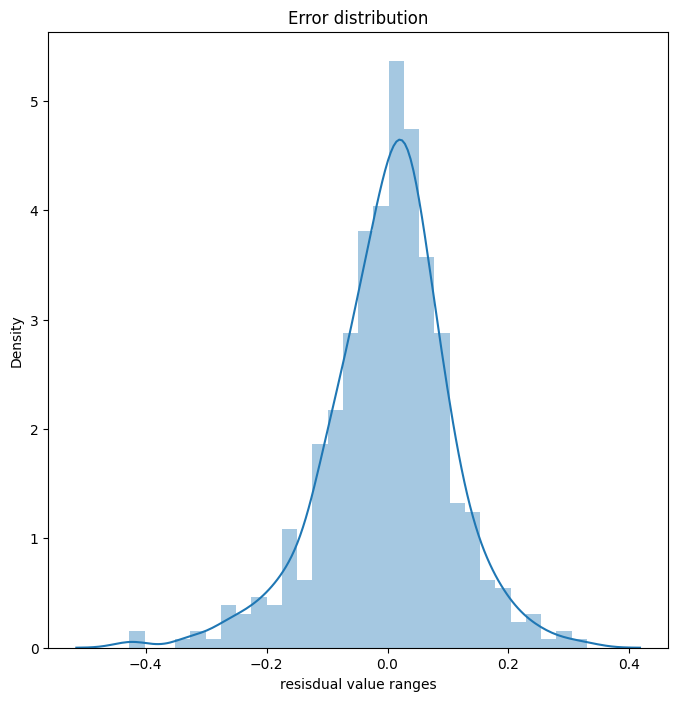

In [3903]:
# plotting the distribution of the error terms
res = y_train - y_train_predict
plt.figure(figsize = (8,8))
sns.distplot(res, bins = 30)
plt.title('Error distribution')
plt.xlabel('resisdual value ranges');

###### inference: normal distribution of the error terms

## Residual analysis

##### Error Terms are Independent

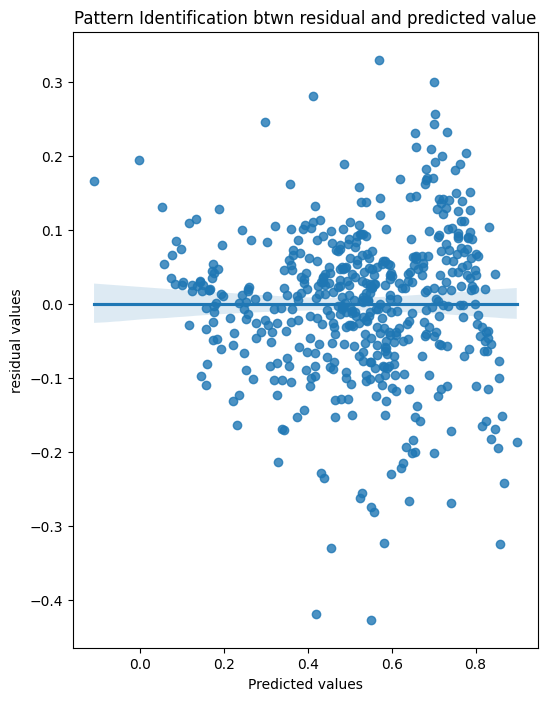

In [3904]:
plt.figure(figsize = (6,8))
sns.regplot(x=y_train_predict, y=res)
plt.title('Pattern Identification btwn residual and predicted value')
plt.xlabel('Predicted values')
plt.ylabel('residual values');

## Homoscedasticity

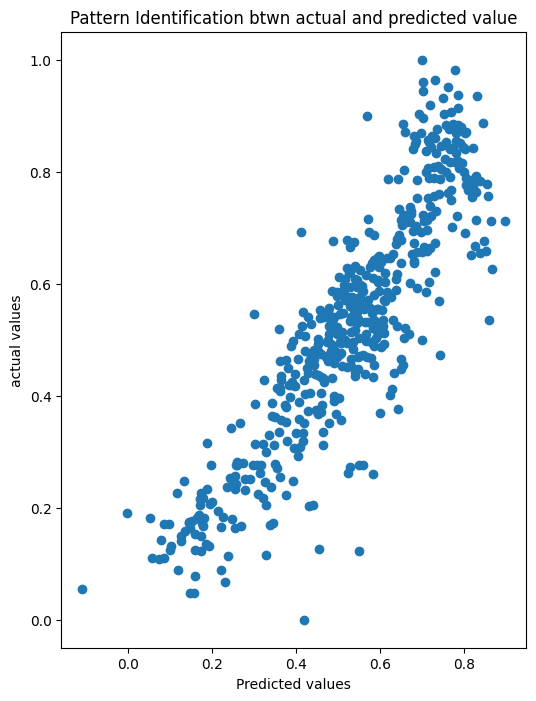

In [3905]:
plt.figure(figsize = (6,8))
plt.scatter(x=y_train_predict, y=y_train)
plt.title('Pattern Identification btwn actual and predicted value')
plt.xlabel('Predicted values')
plt.ylabel('actual values');

# Model evaluation

### prediction of values on test data

In [3906]:
test_data

yr  holiday  workingday       temp      hum  windspeed   cnt  \
248   0        0           1  22.140000  88.6957  23.044181  2710   
298   0        0           1  19.850847  72.0417   9.959014  3894   
159   0        0           0  33.141653  56.8333  10.042161  3915   
660   1        0           1  22.310847  64.1667   6.334569  7466   
511   1        0           1  28.290000  69.7083  14.416457  6591   
..   ..      ...         ...        ...      ...        ...   ...   
242   0        0           1  26.923347  59.7917   5.583331  5058   
486   1        0           1  23.130847  79.7083   9.249886  6169   
434   1        0           1  14.831299  47.6957  14.913329  4911   
540   1        0           1  29.349153  50.4167  20.125661  6779   
589   1        0           1  29.554153  54.5417   9.126204  6883   

     season_spring  season_summer  season_winter  ...  mnth_dec  mnth_feb  \
248              0              0              0  ...         0         0   
298              0              0              1  ...         0         0   
159              0              1              0  ...         0         0   
660              0              0              1  ...         0         0   
511              0              1              0  ...         0         0   
..             ...            ...            ...  ...       ...       ...   
242              0              0              0  ...         0         0   
486              0              1              0  ...         0         0   
434              1              0              0  ...         0         0   
540              0              0              0  ...         0         0   
589              0              0              0  ...         0         0   

     mnth_jan  mnth_july  mnth_june  mnth_mar  mnth_may  mnth_nov  mnth_oct  \
248         0          0          0         0         0         0         0   
298         0          0          0         0         0         0         1   
159         0          0          1         0         0         0         0   
660         0          0          0         0         0         0         1   
511         0          0          0         0         1         0         0   
..        ...        ...        ...       ...       ...       ...       ...   
242         0          0          0         0         0         0         0   
486         0          0          0         0         1         0         0   
434         0          0          0         1         0         0         0   
540         0          0          1         0         0         0         0   
589         0          0          0         0         0         0         0   

     mnth_sep  
248         1  
298         0  
159         0  
660         0  
511         0  
..        ...  
242         0  
486         0  
434         0  
540         0  
589         0  

[220 rows x 29 columns]

In [3907]:
# scaling of features
from sklearn.preprocessing import MinMaxScaler 
test_data[['temp','windspeed','hum','cnt']] = scaler.transform(test_data[['temp','windspeed','hum','cnt']])
test_data

yr  holiday  workingday      temp       hum  windspeed       cnt  \
248   0        0           1  0.608667  0.880915   0.767112  0.309250   
298   0        0           1  0.537996  0.649072   0.301190  0.445467   
159   0        0           0  0.948314  0.437354   0.304151  0.447883   
660   1        0           1  0.613942  0.539443   0.172135  0.856420   
511   1        0           1  0.798532  0.616589   0.459906  0.755752   
..   ..      ...         ...       ...       ...        ...       ...   
242   0        0           1  0.756340  0.478539   0.145386  0.579383   
486   1        0           1  0.639257  0.755800   0.275940  0.707202   
434   1        0           1  0.383031  0.310149   0.477598  0.562471   
540   1        0           1  0.831231  0.348028   0.663193  0.777382   
589   1        0           1  0.837559  0.405453   0.271536  0.789347   

     season_spring  season_summer  season_winter  ...  mnth_dec  mnth_feb  \
248              0              0              0  ...         0         0   
298              0              0              1  ...         0         0   
159              0              1              0  ...         0         0   
660              0              0              1  ...         0         0   
511              0              1              0  ...         0         0   
..             ...            ...            ...  ...       ...       ...   
242              0              0              0  ...         0         0   
486              0              1              0  ...         0         0   
434              1              0              0  ...         0         0   
540              0              0              0  ...         0         0   
589              0              0              0  ...         0         0   

     mnth_jan  mnth_july  mnth_june  mnth_mar  mnth_may  mnth_nov  mnth_oct  \
248         0          0          0         0         0         0         0   
298         0          0          0         0         0         0         1   
159         0          0          1         0         0         0         0   
660         0          0          0         0         0         0         1   
511         0          0          0         0         1         0         0   
..        ...        ...        ...       ...       ...       ...       ...   
242         0          0          0         0         0         0         0   
486         0          0          0         0         1         0         0   
434         0          0          0         1         0         0         0   
540         0          0          1         0         0         0         0   
589         0          0          0         0         0         0         0   

     mnth_sep  
248         1  
298         0  
159         0  
660         0  
511         0  
..        ...  
242         0  
486         0  
434         0  
540         0  
589         0  

[220 rows x 29 columns]

In [3908]:
# creating y test dataframe using cnt
y_test = test_data.pop('cnt')

In [3909]:
# x test data as test data without target variable
x_test = test_data

In [3910]:
# predicting using the model
x_test_sm = sm.add_constant(x_test[rfe_col])
y_test_predict = lm_model.predict(x_test_sm)


In [3911]:
y_test_predict

248    0.129177
298    0.436436
159    0.619066
660    0.779151
511    0.829630
         ...   
242    0.499087
486    0.736383
434    0.517528
540    0.779925
589    0.783631
Length: 220, dtype: float64

### r squared for both test and train data

In [3912]:
from sklearn.metrics import r2_score
test = r2_score(y_test, y_test_predict)
test

0.8302938524833459

In [3913]:
from sklearn.metrics import r2_score
train = r2_score(y_train, y_train_predict)
train

0.7831035944357204